## 1. The 10-armed testbed

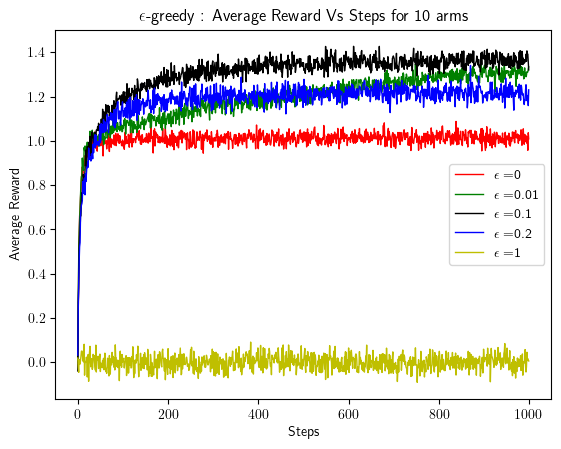

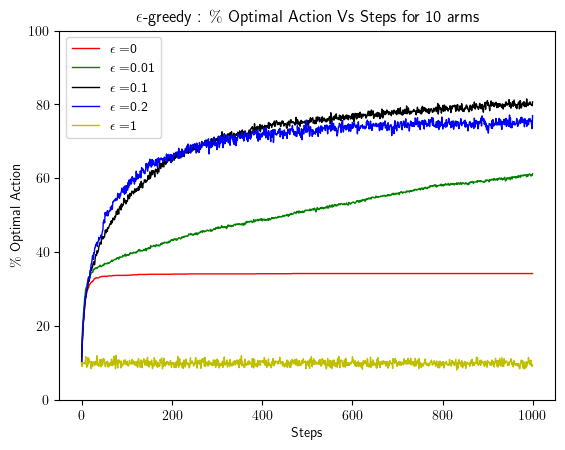

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

n_bandit = 2000     # number of bandit problems
k = 10              # number of arms
n_pulls = 1000      # number of steps
epsilons = [0, 0.01, 0.1, 0.2, 1]   
col=['r','g','k','b','y'] 

q_true = np.random.normal(0, 1, (n_bandit, k))  # true value
a_true_opt = np.argmax(q_true, 1)               # best action

fig1=plt.figure().add_subplot(111)
fig2=plt.figure().add_subplot(111)

for c, eps in enumerate(epsilons):
    avg_reward_pulls = []                       # average reward for per steps
    optimal_actions = []                        # optimal_actions (%) for per steps

    N = np.zeros((n_bandit, k))
    Q = np.zeros((n_bandit, k))                 # value estimate

    for _ in range(n_pulls):
        # average reward for tasks in per step, use incremental formulation
        avg_reward_tasks = 0
        # total optimal_actions for tasks in per step
        total_optimal_actions = 0
        for i in range(n_bandit):
            if random.random() < eps:
                j = np.random.randint(k)
            
            else:
                max_val = np.max(Q[i])
                max_indices = np.where(Q[i] == max_val)[0]
                if len(max_indices) > 1:
                    j = random.choice(max_indices)
                else:
                    j = max_indices[0]
                
            # if it is the optimal aciton
            if j == a_true_opt[i]:
                total_optimal_actions += 1
            
            temp_R = np.random.normal(q_true[i][j], 1)
            # sample-average action selection
            N[i][j] += 1
            Q[i][j] += (temp_R - Q[i][j]) / N[i][j]

            avg_reward_tasks += (temp_R - avg_reward_tasks) / (i + 1)
        
        avg_reward_pulls.append(avg_reward_tasks)
        optimal_actions.append(total_optimal_actions * 100.0 / n_bandit)
    
    # show results
    fig1.plot(range(n_pulls), avg_reward_pulls, col[c], linewidth = 1)
    fig2.plot(range(n_pulls), optimal_actions, col[c], linewidth = 1)
  

plt.rc('text',usetex=True)
fig1.title.set_text(r'$\epsilon$-greedy : Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend((r"$\epsilon=$"+str(epsilons[0]),\
			 r"$\epsilon=$"+str(epsilons[1]),\
				r"$\epsilon=$"+str(epsilons[2]),\
					r"$\epsilon=$"+str(epsilons[3]),\
						r"$\epsilon=$"+str(epsilons[4])),loc='best')
fig2.title.set_text(r'$\epsilon$-greedy : $\%$ Optimal Action Vs Steps for 10 arms')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r"$\epsilon=$"+str(epsilons[0]),\
			 r"$\epsilon=$"+str(epsilons[1]),\
				r"$\epsilon=$"+str(epsilons[2]),\
					r"$\epsilon=$"+str(epsilons[3]),\
						r"$\epsilon=$"+str(epsilons[4])),loc='best')



plt.show()


## 2. Exercise 2.5 (Programming)  
  
Design and conduct an experiment to demonstrate the `difficulties` that `sample-average methods` have for `nonstationary problems`.  
  
Use a modified version of the `10-armed testbed` in which all the `$q_*(a)$ start out equal` and then take `independent random walks` (say by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the $q_*(a)$ on each step).   
  
Prepare plots like Figure 2.2 for an action-value method using `sample averages`, incrementally computed, and another action-value method using a `constant step-size` parameter, `$\alpha = 0.1$`. Use `$\varepsilon = 0.1$` and longer runs, say of `10,000 steps`.


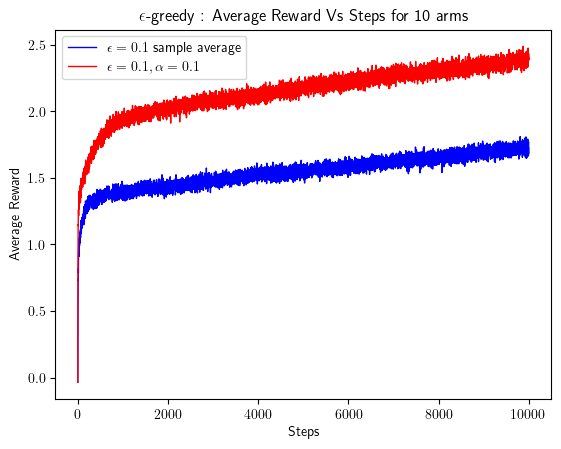

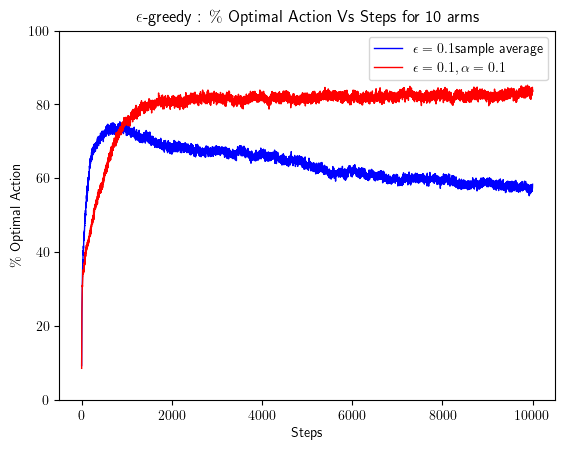

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

n_bandit = 2000         # number of bandit problems
k = 10                  # number of arms
n_pulls = 10000         # number of steps

q_true = np.random.normal(0, 1, (n_bandit, k))  # true value
a_true_opt = np.argmax(q_true, 1)               # best action

fig1=plt.figure().add_subplot(111)
fig2=plt.figure().add_subplot(111)

methods = ['sample-average', 'constant step-size']
col = ['b', 'r']

epsilon = 0.1

for c, m in enumerate(methods):
    avg_reward_pulls = []                       # average reward for per steps
    optimal_actions = []                        # optimal_actions (%) for per steps

    Q = np.zeros((n_bandit, k))                 # value estimate
    N = np.zeros((n_bandit, k))

    for _ in range(n_pulls):
        if _ > 1:
            # random walk
            q_true = np.random.normal(q_true, 0.01)
            a_true_opt = np.argmax(q_true, 1)
        
        # average reward for tasks in per step, use incremental formulation
        avg_reward_tasks = 0
        # total optimal_actions for tasks in per step
        total_optimal_actions = 0
        for i in range(n_bandit):
            if random.random() < epsilon:
                j = np.random.randint(k)
            
            else:
                max_val = np.max(Q[i])
                max_indices = np.where(Q[i] == max_val)[0]
                if len(max_indices) > 1:
                    j = random.choice(max_indices)
                else:
                    j = max_indices[0]
                
            # if it is the optimal aciton
            if j == a_true_opt[i]:
                total_optimal_actions += 1
            
            temp_R = np.random.normal(q_true[i][j], 1)
            # sample-average action selection
            if m == 'sample-average':
                N[i][j] += 1
                Q[i][j] += (temp_R - Q[i][j]) / N[i][j]
            else:
                Q[i][j] += (temp_R - Q[i][j]) * 0.1

            avg_reward_tasks += (temp_R - avg_reward_tasks) / (i + 1)
        
        avg_reward_pulls.append(avg_reward_tasks)
        optimal_actions.append(total_optimal_actions * 100.0 / n_bandit)
    
    # show results
    fig1.plot(range(n_pulls), avg_reward_pulls, col[c], linewidth = 1)
    fig2.plot(range(n_pulls), optimal_actions, col[c], linewidth = 1)


plt.rc('text',usetex=True)
fig1.title.set_text(r'$\epsilon$-greedy : Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend((r"$\epsilon=0.1$ "+'sample average',\
			 r"$\epsilon=0.1, \alpha = 0.1$",),loc='best')
fig2.title.set_text(r'$\epsilon$-greedy : $\%$ Optimal Action Vs Steps for 10 arms')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r"$\epsilon=0.1$"+'sample average',\
			 r"$\epsilon=0.1, \alpha = 0.1$",),loc='best')


plt.show()


## 3. Optimistic Initial Values

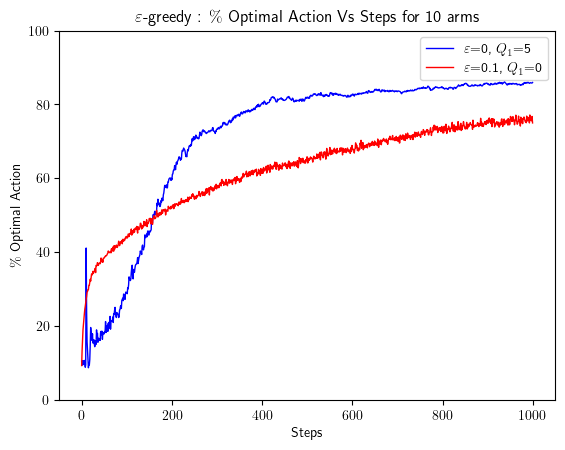

In [75]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

n_bandit = 2000         # number of bandit problems
k = 10                  # number of arms
n_pulls = 1000          # number of steps

q_true = np.random.normal(0, 1, (n_bandit, k))  # true value
a_true_opt = np.argmax(q_true, 1)               # best action

fig1=plt.figure().add_subplot(111)


epsilons = [0, 0.1]
col = ['b', 'r']


for c, eps in enumerate(epsilons):
    optimal_actions = []                        # optimal_actions (%) for per steps

    Q = np.zeros((n_bandit, k))                 # value estimate
    if eps == 0:
        Q = np.ones((n_bandit, k)) * 5.0        
    

    for _ in range(n_pulls):
        
        # total optimal_actions for tasks in per step
        total_optimal_actions = 0
        for i in range(n_bandit):
            if random.random() < eps:
                j = np.random.randint(k)
            
            else:
                max_val = np.max(Q[i])
                max_indices = np.where(Q[i] == max_val)[0]
                if len(max_indices) > 1:
                    j = random.choice(max_indices)
                else:
                    j = max_indices[0]
                
            # if it is the optimal aciton
            if j == a_true_opt[i]:
                total_optimal_actions += 1
            
            temp_R = np.random.normal(q_true[i][j], 1)
            
            # constant step-size  
            Q[i][j] += (temp_R - Q[i][j]) * 0.1

        
        optimal_actions.append(total_optimal_actions * 100.0 / n_bandit)
    
    # show results
    fig1.plot(range(n_pulls), optimal_actions, col[c], linewidth = 1)


plt.rc('text',usetex=True)
fig1.title.set_text(r'$\varepsilon$-greedy : $\%$ Optimal Action Vs Steps for 10 arms')
fig1.set_ylabel(r'$\%$ Optimal Action')
fig1.set_ylim(0, 100)
fig1.set_xlabel('Steps')
fig1.legend((r"$\varepsilon$=0, $Q_1$=5",\
			 r"$\varepsilon$=0.1, $Q_1$=0",),loc='best')


plt.show()


## 4. UCB

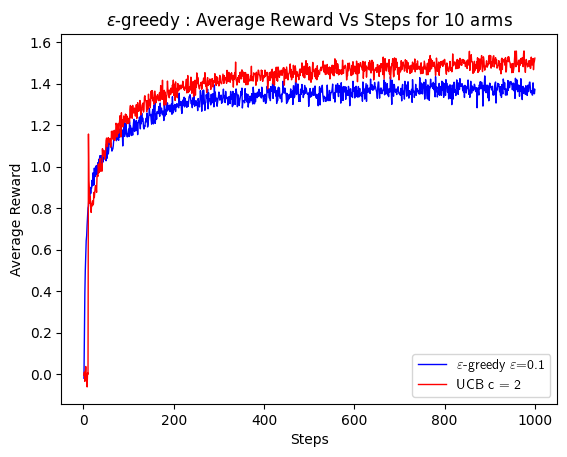

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

n_bandit = 2000         # number of bandit problems
k = 10                  # number of arms
n_pulls = 1000          # number of steps

q_true = np.random.normal(0, 1, (n_bandit, k))  # true value

fig1=plt.figure().add_subplot(111)

methods = ['epsilon-greedy','ucb']
col = ['b', 'r']
epsilon = 0.1

for c, m in enumerate(methods):
    avg_reward_pulls = []                       # average reward for per steps

    Q = np.zeros((n_bandit, k))                 # value estimate
    N = np.zeros((n_bandit, k))

    for t in range(1, 1 + n_pulls):
        # average reward for tasks in per step, use incremental formulation
        avg_reward_tasks = 0
      
        for i in range(n_bandit):
            if m == 'epsilon-greedy':
                if random.random() < epsilon:
                    j = np.random.randint(k)
                
                else:
                    max_val = np.max(Q[i])
                    max_indices = np.where(Q[i] == max_val)[0]
                    if len(max_indices) > 1:
                        j = random.choice(max_indices)
                    else:
                        j = max_indices[0]
            # ucb method
            else:
                if 0 in N[i]:
                    max_indices = np.where(N[i] == 0)[0]
                    if len(max_indices) > 1:
                        j = random.choice(max_indices)
                    else:
                        j = max_indices[0]
                else:
                    ucb_list = Q[i] + 2 * np.sqrt(np.log(t) / N[i])
                    max_val = np.max(ucb_list)
                    max_indices = np.where(ucb_list == max_val)[0]
                    if len(max_indices) > 1:
                        j = random.choice(max_indices)
                    else:
                        j = max_indices[0]
            
            temp_R = np.random.normal(q_true[i][j], 1)
            
            # sample-average action selection
            N[i][j] += 1
            Q[i][j] += (temp_R - Q[i][j]) / N[i][j]
            
            avg_reward_tasks += (temp_R - avg_reward_tasks) / (i + 1)
        
        avg_reward_pulls.append(avg_reward_tasks)
        
    # show results
    fig1.plot(range(1,n_pulls+1), avg_reward_pulls, col[c], linewidth = 1)
    


plt.rc('text',usetex=True)
fig1.title.set_text(r'$\varepsilon$-greedy : Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')


fig1.legend((r"$\varepsilon$-greedy $\varepsilon$=0.1 ",\
			 r"UCB c = 2",),loc='best')



plt.show()



## 5. gradient bandit algorithm

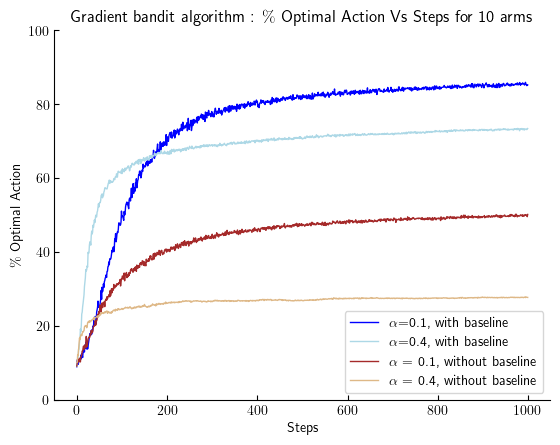

In [68]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

n_bandit = 2000         # number of bandit problems
k = 10                  # number of arms
n_pulls = 1000          # number of steps

q_true = np.random.normal(4, 1, (n_bandit, k))  # true value
a_true_opt = np.argmax(q_true, 1)

fig1=plt.figure().add_subplot(111)

methods = [0.1, 0.4, 0.1, 0.4]      # alpha
col = ['b', '#ADD8E6','brown','#DEB887']


for c, alpha in enumerate(methods):
    optimal_actions = []                        # optimal_actions (%) for per steps

    R = np.zeros(n_bandit)                 # baseline for per bandit task, using incremental formulation
    H = np.zeros((n_bandit, k))            
    
    for t in range(1, n_pulls + 1):
        # total optimal_actions for tasks in per step
        total_optimal_actions = 0
        
        for i in range(n_bandit):
            exp = np.exp(H[i] - max(H[i]))  # - max(H[i]) for numerical stability
            prob = exp / sum(exp)    
            j = np.random.choice(range(k), 1, p = prob)
                
            # if it is the optimal aciton
            if j == a_true_opt[i]:
                total_optimal_actions += 1
            
            temp_R = np.random.normal(q_true[i][j], 1)

            # update H[i]
            if c > 1:       
                R[i] = 0        # without baseline
            
            if t > 1:
                for a in range(k):
                    if a == j:
                        H[i][a] += alpha * (temp_R - R[i]) * (1 - prob[a])
                    else:
                        H[i][a] -= alpha * (temp_R - R[i]) * prob[a]

            # update H[i]
            if c > 1:       
                R[i] = 0        # without baseline
            else:
                R[i] += (temp_R - R[i]) / t

        
        optimal_actions.append(total_optimal_actions * 100.0 / n_bandit)
    
    # show results
    fig1.plot(range(n_pulls), optimal_actions, col[c], linewidth = 1)


plt.rc('text',usetex=True)
fig1.title.set_text(r'Gradient bandit algorithm : $\%$ Optimal Action Vs Steps for 10 arms')
fig1.set_ylabel(r'$\%$ Optimal Action')
fig1.set_ylim(0, 100)
fig1.set_xlabel('Steps')
fig1.legend((r"$\alpha$=0.1, with baseline",\
			r"$\alpha$=0.4, with baseline",\
            r"$\alpha$ = 0.1, without baseline",\
            r"$\alpha$ = 0.4, without baseline",),loc='best')


fig1.spines['right'].set_visible(False)
fig1.spines['top'].set_visible(False)
fig1.tick_params(direction='in', which='both', axis='both')

plt.show()




## 6. parameter study of the various bandit algorithms

#### 6.1 $\varepsilon$-greedy

In [ ]:
import numpy as np
import random
import os

n_bandit = 2000     # number of bandit problems
k = 10              # number of arms of each bandit problem

q_true = np.random.normal(0,1, (n_bandit, k))   # true values
n_pulls = 1000      # number of steps

epsilon = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]   # epsilon-greedy method
eps_res_total = []  # save total result

file_path = os.path.abspath(os.path.dirname(__file__))  # path to save results

for eps in epsilon:
    print('epsilon: ', eps)
    # value estimate
    Q = np.zeros((n_bandit, k))
    N = np.zeros((n_bandit, k))
    
    # average reward per epsilon
    avg_eps_res = 0

    for pull in range(1, n_pulls + 1):
        # average reward per pull
        avg_pull_res = 0

        for i in range(n_bandit):
            # epsilon-greedy method
            if random.random() < eps:
                j = np.random.randint(k)
            
            else:
                max_value = np.max(Q[i])
                max_indices = np.where(max_value == Q[i])[0]
                if len(max_indices) > 1:
                    j = random.choice(max_indices)
                else:
                    j = max_indices[0]
            

            temp_R = np.random.normal(q_true[i][j], 1)
            
            N[i][j] += 1
            Q[i][j] += (temp_R - Q[i][j]) / N[i][j]
            
            # incremental equation
            avg_pull_res += (temp_R - avg_pull_res) / (i + 1)

        avg_eps_res += (avg_pull_res - avg_eps_res) / pull
    
    eps_res_total.append(avg_eps_res)

# save result
eps_res_total = np.array(eps_res_total)
epsilon = np.array(epsilon)
np.save(f'{file_path}/np_data/epsilon-x.npy',epsilon)
np.save(f'{file_path}/np_data/epsilon-weighted.npy', eps_res_total)

#### 6.2 greedy

In [ ]:
import numpy as np
import random
import os

n_bandit = 2000     # number of bandit
k = 10              # number of arms
n_pulls = 1000      # number of steps

q_true = np.random.normal(0,1,(n_bandit, k))

greedy_res_total = []   # save total result

Q_0 = [1/4, 1/2, 1.0, 2, 4]
alpha = 0.1             # weighted-average action selection method
current_dir = os.path.abspath(os.path.dirname(__file__))        # save results

for val in Q_0:
    # initial value estimates with optimisitc strategy
    Q = np.ones((n_bandit, k)) * val
    
    # average reward per greedy
    avg_greedy_res = 0    

    for pull in range(1,n_pulls + 1):
        # average reward per pull
        avg_pull_res = 0

        for i in range(n_bandit):
            # greedy method
            max_value = np.max(Q[i])
            max_indices = np.where(max_value == Q[i])[0]
            if len(max_indices) > 1:
                j = random.choice(max_indices)
            else:
                j = max_indices[0]
            
            temp_R = np.random.normal(q_true[i][j], 1)

            # weight-average method
            Q[i][j] += (temp_R - Q[i][j]) * alpha
            
            avg_pull_res += (temp_R - avg_pull_res) / (i + 1)
        
        avg_greedy_res += (avg_pull_res - avg_greedy_res) / pull
    
    greedy_res_total.append(avg_greedy_res)

# save results
greedy_res_total = np.array(greedy_res_total)
Q_0 = np.array(Q_0)
np.save(f'{file_path}/np_data/greedy-x.npy', Q_0)
np.save(f'{file_path}/np_data/greedy-weighted.npy', greedy_res_total)




#### 6.3 UCB

In [ ]:
import numpy as np
import random
import os

n_bandit = 2000     # number of bandit problems
k = 10              # number of arms of each bandit problem
n_pulls = 1000      # steps

q_true = np.random.normal(0, 1, (n_bandit, k))

C = [1/16, 1/8, 1/4, 1/2, 1, 2, 4]

ucb_res_total = []  # save total results
file_path = os.path.abspath(os.path.dirname(__file__))

for c in C:
    print ('Current value of c : ',c)
    
    # initial value estimate
    Q = np.zeros((n_bandit, k))
    # action value
    N = np.zeros((n_bandit, k))
    avg_ucb_res = 0

    for n_pull in range(1, n_pulls + 1):
        avg_pull_res = 0

        for i in range(n_bandit):
            if 0 in N[i]:
                max_indices = np.where(N[i] == 0)[0]
                if len(max_indices) > 1:
                    j = random.choice(max_indices)
                else:
                    j = max_indices[0]
            else:
                ucb_Q = Q[i] +  c * np.sqrt(np.log(n_pull) /N[i])  
                max_val = np.max(ucb_Q)
                max_indices = np.where(ucb_Q == max_val)[0]
                if len(max_indices) > 1:
                    j = random.choice(max_indices)
                else:
                    j = max_indices[0]

            temp_R = np.random.normal(q_true[i][j], 1)
            N[i][j] += 1
            Q[i][j] += (temp_R - Q[i][j]) / N[i][j]

            avg_pull_res += (temp_R - avg_pull_res) / (i + 1)
        
        avg_ucb_res += (avg_pull_res - avg_ucb_res) / n_pull

    ucb_res_total.append(avg_ucb_res)


# save result
ucb_res_total = np.array(ucb_res_total)
C = np.array(C)
np.save(f'{file_path}/np_data/ucb-x.npy', C)
np.save(f'{file_path}/np_data/ucb-weighted.npy', ucb_res_total)

#### 6.4 gradient bandit algorithm

In [ ]:
import numpy as np
import random
import os

n_bandit = 2000     # number of bandit
k = 10              # number of arms
n_pulls = 1000      # steps

q_true = np.random.normal(0, 1, (n_bandit, k))  # true value

ALPHA = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 2.4]

g_res_total = []    # total results
file_path = os.path.abspath(os.path.dirname(__file__))

for alpha in ALPHA:
    H = np.zeros((n_bandit, k))
    
    # average reward of each alpha 
    avg_alpha_res = 0
    Q = np.zeros(n_bandit)

    for n_pull in range(1, n_pulls + 1):
        avg_pull_res = 0

        for i in range(n_bandit):
            # get probability
            sft_prob = np.exp(H[i] - max(H[i]))         # for numerical stability
            prob = sft_prob / sum(sft_prob)             # \pi_t(a)
            j = np.random.choice(range(k), 1, p = prob) # pick one arm based on softmax probability
            
            temp_R = np.random.normal(q_true[i][j], 1)

            # update H
            if n_pull > 1:
                for action in range(k):
                    if action == j:
                        H[i][action] += alpha * (temp_R - Q[i]) * (1 - prob[action])
                    else:
                        H[i][action] -= alpha * (temp_R - Q[i]) * prob[action]
            
            # update base reward of each bandit problem
            Q[i] = Q[i] + (temp_R - Q[i]) / n_pull
            avg_pull_res += (temp_R - avg_pull_res) / (i + 1)
        
        avg_alpha_res += (avg_pull_res - avg_alpha_res) / n_pull
    
    g_res_total.append(avg_alpha_res)

# save results
g_res_total = np.array(g_res_total)
ALPHA = np.array(ALPHA)
np.save(f'{file_path}/np_data/gradient-x.npy', ALPHA)
np.save(f'{file_path}/np_data/gradient-weighted.npy', g_res_total)
            

#### 6.5 visualize

In [ ]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 定义坐标刻度
x_ticks = [1/128, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_labels = ['1/128', '1/64', '1/32', '1/16', '1/8', '1/4', '1/2', '1', '2', '4']

num2label = {
    1/128: 1/128,
    1/64: 1,
    1/32: 2,
    1/16: 3,
    1/8: 4,
    1/4: 5,
    1/2: 6,
    1: 7,
    2: 8,
    2.4: 8.3,
    4: 9,
}


fig, ax = plt.subplots()

col = ['r-','k-','g-','b-']

current_dir = os.path.abspath(os.path.dirname(__file__))
file_path = f'{current_dir}/np_data'

curve_list = ['epsilon','greedy','gradient','ucb']

for i, m in enumerate(curve_list):
    y = os.path.join(file_path, f'{m}-weighted.npy')
    y = np.load(y)
    
    x = os.path.join(file_path, f'{m}-x.npy')
    x = np.load(x)
    x = [num2label[k] for k in x]

    ax.plot(x, y, col[i], linewidth = 1)

plt.rc('text', usetex = True)


ax.text(2/128, 1.28, r'$\varepsilon$-greedy', fontsize=16, color='red')
ax.text(5, 1.25, r'gradient', fontsize=16, color='green')
ax.text(5, 1.21, r'bandit', fontsize=16, color='green')
ax.text(4.5, 1.45, r'UCB', fontsize=16, color='blue')
ax.text(8.5, 1.45, r'greedy with', fontsize=16, color='black')
ax.text(8.9, 1.41, r'optimistic', fontsize=16, color='black')
ax.text(8.5, 1.37, r'initialization ', fontsize=16, color='black')
ax.text(8.9, 1.33, r'$\alpha=0.1$', fontsize = 16, color = 'black')

ax.set_ylim(0.95,1.5)

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)


"""..."""
ax.text(0.3, -0.1, r'$\varepsilon$', fontsize=18, color='red', ha='center', transform=ax.transAxes)
ax.text(0.5, -0.1, r'$\alpha$', fontsize=18, color='green', ha='center', transform=ax.transAxes)
ax.text(0.7, -0.1, r'$c$', fontsize=18, color='blue', ha='center', transform=ax.transAxes)
ax.text(0.9, -0.1, r'$Q_0$', fontsize=18, color='black', ha='center', transform=ax.transAxes)

"""..."""

ax.set_ylabel('Average reward over first 1000 steps',fontsize = 18)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(direction='in', which='both', axis='both')

plt.show()

